In [1]:
from YOLOv8_Explainer import yolov8_heatmap, yolov8_target, display_images

In [ ]:
# 1) heatmap 객체 생성
model = yolov8_heatmap(
    weight=r"C:\Users\USER\Desktop\my_git\safebaby-xai\yolov8_explain\runs\detect\train2\weights\best.pt",
    method="GradCAM",
)

Model summary: 295 layers, 25,859,794 parameters, 0 gradients, 79.1 GFLOPs


1


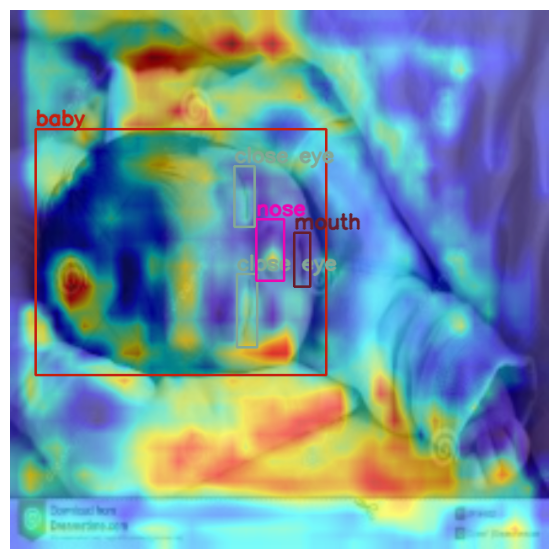

In [3]:
imagelist = model(
    img_path=r"C:\Users\USER\Downloads\processed_front_03\f0358_dark_sr.jpeg", 
    )
print(len(imagelist))
display_images(imagelist)

In [4]:
import torch
import torch.nn as nn

class yolov8_target_nose_mouth(nn.Module):
    """
    YOLOv8 Target class that only uses class 3 (mouth) and class 4 (nose)
    for Grad-CAM scoring.
    """
    def __init__(self, conf=0.2, ratio=0.02):
        super().__init__()
        self.target_classes = [3, 4]  # nose=4, mouth=3
        self.conf = conf
        self.ratio = ratio

    def forward(self, data):
        """
        data = [post_result, pre_post_boxes]
        post_result: (n, num_classes)  - class scores
        pre_post_boxes: (n, 4)
        We'll sum up only class 3 or 4 scores if they exceed self.conf
        """
        post_result, pre_post_boxes = data
        result_scores = []

        for i in range(post_result.size(0)):
            for cls_id in self.target_classes:
                score = float(post_result[i, cls_id])
                if score >= self.conf:
                    result_scores.append(score)

        if len(result_scores) == 0:
            # If no nose/mouth detection >= conf, return 0.0 tensor
            return torch.tensor(0.0, requires_grad=True, device=post_result.device)

        return torch.tensor(sum(result_scores), requires_grad=True, device=post_result.device)


In [5]:
import os
import cv2
import torch
import numpy as np
from PIL import Image
from ultralytics.nn.tasks import attempt_load_weights
from pytorch_grad_cam import GradCAM
from .utils import letterbox
from .core import ActivationsAndGradients  # from your original code
from .core import yolov8_heatmap  # base heatmap class
from .yolov8_target_nose_mouth import yolov8_target_nose_mouth  # import the custom target

class yolov8_heatmap_nose_mouth(yolov8_heatmap):
    """
    Subclassing the original yolov8_heatmap to inject our custom target 
    that only focuses on classes 3,4 (mouth, nose).
    """
    def __init__(self,
                 weight: str,
                 device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
                 method="GradCAM",
                 layer=[12, 17, 21],
                 conf_threshold=0.2,
                 ratio=0.02,
                 show_box=True,
                 renormalize=False) -> None:
        super().__init__(weight, device, method, layer, conf_threshold, ratio, show_box, renormalize)

        # Overwrite the default target with our custom one
        self.target = yolov8_target_nose_mouth(conf=conf_threshold, ratio=ratio)

    # The rest of the methods (post_process, draw_detections, etc.) 
    # remain the same as parent class


ImportError: attempted relative import with no known parent package

In [ ]:
import os
from .core import display_images
from .yolov8_heatmap_nose_mouth import yolov8_heatmap_nose_mouth

def main():
    # 1) Heatmap 객체 생성
    model = yolov8_heatmap_nose_mouth(
        weight=r"C:\Users\USER\Desktop\my_git\safebaby-xai\yolov8_explain\runs\detect\train2\weights\best.pt",
        method="GradCAM",  # GradCAM, EigenGradCAM, etc.
        conf_threshold=0.2,
        ratio=0.02,
        show_box=True,
        renormalize=False
    )

    # 2) 이미지 경로
    img_path = r"C:\Users\USER\Downloads\processed_front_03\f0358_dark_sr.jpeg"

    # 3) Grad-CAM 실행
    results = model(img_path)  # returns list of PIL Images
    # 4) 결과 시각화
    display_images(results)

if __name__ == "__main__":
    main()


ImportError: attempted relative import with no known parent package